In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import numpy as np

from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
from os import walk
import random as rd
import pickle
import time

In [2]:
#load data
mypath='My Data/simplified'
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break

outp=[]
a=[]
tlen=len(f)
i=0
dtall=np.zeros(1)
outputfortraining=np.zeros(1)
for a in f[:]:
    outp2=a.replace('_',' ').replace('full numpy bitmap','').split('.')[0]
    a=mypath+'/'+a
    dt=np.load(a)
    #otp=np.zeros([ len(dt),tlen],dtype='float') 
    otp=np.zeros([ len(dt),1],dtype='float') 
    #print(len(otp[0]))
    otp[:, 0] = i
    if (len(outp)==0):
        dtall=dt
        outputfortraining=otp
    else:
        dtall=np.concatenate((dtall,dt),axis=0)
        outputfortraining=np.concatenate((outputfortraining,otp),axis=0)
        del otp
        del dt
    outp.append(outp2)
    i+=1
#dtEifel=np.load('full_numpy_bitmap_The Eiffel Tower.npy')
#dtGreatWall=np.load('full_numpy_bitmap_The Great Wall of China.npy')
#dtMonalisa=np.load('full_numpy_bitmap_The Mona Lisa.npy')
#dtall=np.concatenate((dtEifel,dtGreatWall,dtMonalisa),axis=0)
print(outp)
Outputs=np.array(outputfortraining)
del outputfortraining

[' airplane', ' alarm clock', ' ambulance', ' anvil', ' axe', ' banana', ' basketball', ' bed', ' bicycle', ' The Eiffel Tower']


In [3]:
print(tlen)

10


In [4]:
inputs=dtall
minMaxScaler= MinMaxScaler()
minMaxScaler.fit(inputs)
print(type(inputs[0][0]))
print(inputs.shape)
inputs2=minMaxScaler.transform(inputs)
del inputs
del dtall
inputs=np.array(inputs2,dtype='float16')
del inputs2
print(type(inputs[0][0]))
filehandler = open('minMaxScaler.pickle','wb')
pickle.dump(minMaxScaler,filehandler)
del minMaxScaler
inputs2=np.reshape(inputs,(len(inputs),28,28,1))
del inputs
inputs=inputs2

<class 'numpy.uint8'>
(322095, 784)
<class 'numpy.float16'>


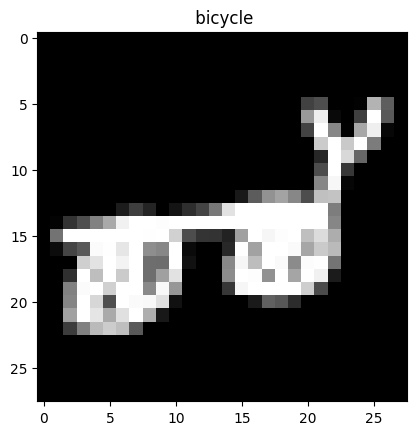

In [5]:
i=rd.randint(0,len(inputs))
plt.imshow(inputs[i], cmap='gray')
t=int(Outputs[i][0])
#print(t)
plt.title(str(outp[t]))
plt.show()


In [6]:

X_train, X_test, y_train, y_test = train_test_split(inputs, Outputs, test_size=0.2, random_state=42)
del Outputs
del inputs

In [7]:
X_train[0,10]
y_train[-1]
#Outputs[-1]
print(tlen)
#len(y_train)

10


In [8]:

'''

model.add(tf.keras.layers.Conv2D(8, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(1, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.UpSampling2D((2, 2))
'''
#tlen=3
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
#model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(8,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
#model.add(tf.keras.layers.Dense(8,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
#model.add(tf.keras.layers.Dense(15,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(tlen,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy','sparse_categorical_crossentropy'])
model.summary()

c:\Users\tecyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
print(X_train.shape)
print(y_train[0])

(257676, 28, 28, 1)
[7.]


In [10]:
checkpoint = ModelCheckpoint('best_weightsFinal.keras', monitor='accuracy', save_best_only=True)
model.fit(X_train[:1], y_train[:1], epochs=1,batch_size=320)
model.load_weights('best_weightsFinal.keras')
for a in range(1,100):
    model.fit(X_train, y_train, epochs=5,batch_size=320,callbacks=[checkpoint])
    print('Take rest',a*5)
    time.sleep(1*60)
    if i%20==0:
        print('Take long rest')
        time.sleep(3*60)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.2392 - sparse_categorical_crossentropy: 2.2392
Epoch 1/5
806/806 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9581 - loss: 0.1515 - sparse_categorical_crossentropy: 0.1515
Epoch 2/5
806/806 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9597 - loss: 0.1444 - sparse_categorical_crossentropy: 0.1444
Epoch 3/5
806/806 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9590 - loss: 0.1469 - sparse_categorical_crossentropy: 0.1469
Epoch 4/5
806/806 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9590 - loss: 0.1494 - sparse_categorical_crossentropy: 0.1494
Epoch 5/5
806/806 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9590 - loss: 0.1471 - sparse_categorical_crossentropy: 0.1471
Take rest 5
Epoch 1/5
806/806 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9588 - loss: 0.1478 - sparse_categorical_crossentropy: 0.1478
Epoch 2/5
806/806 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9592 - loss: 0.1490 - sparse_ca

KeyboardInterrupt: 

In [ ]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
model.load_weights('best_weightsFinal.keras')
model.evaluate(X_test, y_test)

1398/1398 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9450 - loss: 0.2130 - sparse_categorical_crossentropy: 0.2130


[0.20999667048454285, 0.9454236626625061, 0.21012765169143677]